In [45]:
from Utilities import Statistics as statistics
import os
import json
from Entity.Flight import Flight
from datetime import datetime
from Utilities import General

### Graph before labeling


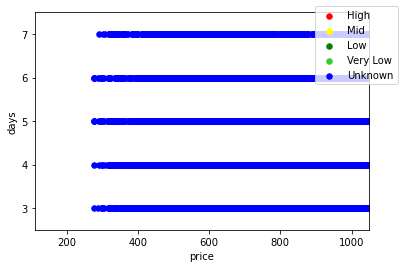

In [46]:
destination="LOND"

statistics.get_statistic_of_destination(destination)

### Load the data of destination

In [47]:
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/json_files_dict.json', 'r') as f:
    dict = json.load(f)
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/airports_countries.json', 'r') as f2:
    shortcut_dict = json.load(f2)
if destination in shortcut_dict:
    fullname_airport = shortcut_dict[destination]['airportName']
    list = dict[fullname_airport]
    flights_data = []
    for json_file in list:
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file) as f:
         data = json.load(f)
        for temp in data:
            flights_data.append((Flight(**temp),json_file))
else:
    raise SystemExit("The destination is not found!")
print(f'The length of data is: {str(len(flights_data))}')
check_data_labeled=[item for item in flights_data if item[0].label==-1]
if len(check_data_labeled)==0:
    raise SystemExit("Data is labeled!")
else:
    print('Data is not labeled')

The length of data is: 37175
Data is not labeled


### The length of data

In [48]:
dict_flights_per_days= {}
for flight in flights_data:
    flight_days=(datetime.strptime(flight[0].return_date, '%Y-%m-%d')
    -datetime.strptime(flight[0].depart_date,'%Y-%m-%d')).days
    try:
        dict_flights_per_days[flight_days].append(flight)
    except KeyError:
        dict_flights_per_days[flight_days]=[]
        dict_flights_per_days[flight_days].append(flight)

for ele,val in dict_flights_per_days.items():
    print(f"{str(ele)} days: {str(len(val))} ")

3 days: 4114 
4 days: 4101 
5 days: 3987 
6 days: 3865 
0 days: 405 
1 days: 1948 
2 days: 1911 
7 days: 1832 
8 days: 1598 
9 days: 1456 
10 days: 1411 
11 days: 1315 
12 days: 1245 
13 days: 1138 
14 days: 1163 
15 days: 1010 
16 days: 948 
17 days: 870 
18 days: 802 
19 days: 722 
20 days: 657 
21 days: 606 
30 days: 13 
22 days: 10 
26 days: 9 
24 days: 11 
29 days: 13 
28 days: 3 
25 days: 4 
23 days: 4 
27 days: 4 


### Filter the irrelevant data

In [49]:
for ele,val in dict_flights_per_days.items():
    for item in val:
        if ele<3 or ele>7:
            item[0].label=0
for item in dict_flights_per_days[2][:5]:
    print(item[0])

Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All London Airports code: LOND
Country:: name: United Kingdom code: GB
depart date:  2020-07-02 return date:  2020-07-04
price:  415 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All London Airports code: LOND
Country:: name: United Kingdom code: GB
depart date:  2020-07-04 return date:  2020-07-06
price:  720 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All London Airports code: LOND
Country:: name: United Kingdom code: GB
depart date:  2020-07-05 return date:  2020-07-07
price:  1184 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All London Airports code: LOND
Country:: name: United King

### Items per class:

In [50]:
relevant_data= {}
for num_days in range(3,8):
    sorted_flight_per_day=sorted(dict_flights_per_days[num_days],
                                 key=lambda x: (x[0]).price)
    length_list=len(sorted_flight_per_day)
    print(f'{num_days} days have {str(length_list)}'
          f' items :')
    if num_days==3:
        mid_rate=0.4
        low_rate=0.02
        very_low_rate=0.004
    elif num_days==4:
        mid_rate=0.4
        low_rate=0.08
        very_low_rate=0.025
    elif num_days==5:
        mid_rate=0.4
        low_rate=0.13
        very_low_rate=0.05
    elif num_days==6:
        mid_rate=0.4
        low_rate=0.13
        very_low_rate=0.05
    elif num_days==7:
        mid_rate=0.4
        low_rate=0.08
        very_low_rate=0.01

    very_low_list=sorted_flight_per_day[0:int(length_list * very_low_rate)]
    low_list=sorted_flight_per_day[int(length_list * very_low_rate):
                                   int(length_list * low_rate)]
    mid_list=sorted_flight_per_day[int(length_list * low_rate):
                                   int(length_list * mid_rate)]
    high_list=sorted_flight_per_day[int(length_list * mid_rate):
                                   int(length_list)]
    print(f'{str(len(high_list))} in high class \n'
          f'{str(len(mid_list))} in mid class \n'
          f'{str(len(low_list))} in low class \n'
          f'{str(len(very_low_list))} in very low class \n')
    relevant_data[num_days]= {}
    relevant_data[num_days]['high rate']=high_list
    relevant_data[num_days]['mid rate']=mid_list
    relevant_data[num_days]['low rate']=low_list
    relevant_data[num_days]['very low rate']=very_low_list

3 days have 4114 items :
2469 in high class 
1563 in mid class 
66 in low class 
16 in very low class 

4 days have 4101 items :
2461 in high class 
1312 in mid class 
226 in low class 
102 in very low class 

5 days have 3987 items :
2393 in high class 
1076 in mid class 
319 in low class 
199 in very low class 

6 days have 3865 items :
2319 in high class 
1044 in mid class 
309 in low class 
193 in very low class 

7 days have 1832 items :
1100 in high class 
586 in mid class 
128 in low class 
18 in very low class 



### Price range per class

In [51]:
for day in range(3,8):
    print(f'{day} days:\nvery low prices: '
          f'{str(int(relevant_data[day]["very low rate"][0][0].price))}-'
      f'{str(int(relevant_data[day]["very low rate"][-1][0].price))}')
    print(f'low prices:{str(int(relevant_data[day]["low rate"][0][0].price))}-'
      f'{str(int(relevant_data[day]["low rate"][-1][0].price))}')
    print(f'mid prices:{str(int(relevant_data[day]["mid rate"][0][0].price))}-'
      f'{str(int(relevant_data[day]["mid rate"][-1][0].price))}')
    print(f'high prices:{str(int(relevant_data[day]["high rate"][0][0].price))}-'
      f'{str(int(relevant_data[day]["high rate"][-1][0].price))}\n')


3 days:
very low prices: 278-319
low prices:322-385
mid prices:387-966
high prices:966-4494

4 days:
very low prices: 278-385
low prices:385-488
mid prices:488-961
high prices:961-3920

5 days:
very low prices: 278-452
low prices:454-581
mid prices:581-968
high prices:968-3305

6 days:
very low prices: 278-461
low prices:461-587
mid prices:588-972
high prices:972-4478

7 days:
very low prices: 290-339
low prices:341-488
mid prices:488-961
high prices:961-3769



### Label data

In [52]:
for day in range(3,8):
    for item in relevant_data[day]["very low rate"]:
        item[0].label=4
    for item in relevant_data[day]["low rate"]:
        item[0].label=3
    for item in relevant_data[day]["mid rate"]:
        item[0].label=2
    for item in relevant_data[day]["high rate"]:
        item[0].label=1
    test_list=[item for item in dict_flights_per_days[day] if item[0].label==-1]
    if len(test_list)!=0:
        print(f'{day} days:Fail,there are leaks in data')
    else:
        print(f'{day} days:Successful')



3 days:Successful
4 days:Successful
5 days:Successful
6 days:Successful
7 days:Successful


### Write down the data to files

In [53]:
data_list=[ele for key,val in dict_flights_per_days.items() for ele in val]
test_data_list=[item for item in data_list if item[0].label==-1]
if len(test_data_list)==0:
    print("The data is valid and start write the data to files")
    dict_flights_per_files={}
    for item in data_list:
        if item[1] in dict_flights_per_files:
            dict_flights_per_files[item[1]].append(item[0])
        else:
            dict_flights_per_files[item[1]]=[]
            dict_flights_per_files[item[1]].append(item[0])
    for json_file,flights in dict_flights_per_files.items():
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file,'w',encoding='utf-8') as f:
            json.dump(flights, f, ensure_ascii=False, default=General.obj_dict, indent=4)

The data is valid and start write the data to files


### Validation for writing data

In [54]:
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/json_files_dict.json', 'r') as f:
    dict = json.load(f)
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/airports_countries.json', 'r') as f2:
    shortcut_dict = json.load(f2)
if destination in shortcut_dict:
    fullname_airport = shortcut_dict[destination]['airportName']
    list = dict[fullname_airport]
    flights_data_valid = []
    for json_file in list:
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file) as f:
         data = json.load(f)
        for temp in data:
            flights_data_valid.append((Flight(**temp),json_file))
else:
    raise SystemExit("The destination is not found!")
if len(flights_data_valid)==len(flights_data):
    print("Successful write data")
else:
    print("Failed write data")

Successful write data


### Graph after labeling

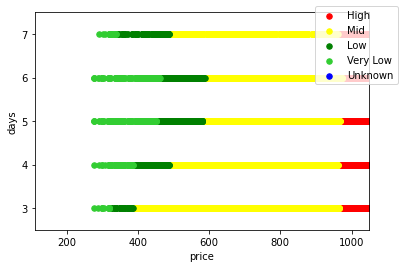

In [55]:
statistics.get_statistic_of_destination(destination)


